In [1]:
import numpy as np
import pandas as pd
import timeit
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


#calculate average execution time
def avg_time(func, num_iterations=10):
    time_taken = timeit.timeit(stmt=func, globals=globals(), number=num_iterations)
    return time_taken / num_iterations


list_time_pd = []
list_time_np = []

In [2]:
#Load Data
file_name = r'DATA\\household_power_consumption.txt'

#Read headers
with open(file_name, 'r') as file:
    headers = file.readline().rstrip('\n').split(";")

print(f"Headers: {headers}")


#Pandas data reading
def readfile_pd(file, header):
    return pd.read_csv(file, sep=";", header=1, names=header, na_values=['?'])


pd_time = avg_time('readfile_pd(file_name, headers)')
list_time_pd.append(pd_time)
print(f'Average Pandas time for file reading: {pd_time:.6f} s')

df = readfile_pd(file_name, headers)


#NumPy data reading
def readfile_np(file, header):
    return np.genfromtxt(file, delimiter=';', dtype=None, names=header, encoding=None, skip_header=1)


np_time = avg_time('readfile_np(file_name, headers)')
list_time_np.append(np_time)
print(f'Average NumPy time for file reading: {np_time:.6f} s')

data_array = readfile_np(file_name, headers)

Headers: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Average Pandas time for file reading: 1.225348 s
Average NumPy time for file reading: 16.367540 s


In [3]:
#Data Cleaning/Handling Missing Values

#Pandas cleaning
df = df.dropna()

if df.isna().any().any() or (df == '?').any().any():
    print("There are empty values in the Pandas DataFrame.")
else:
    print("No empty values in the Pandas DataFrame.")

#NumPy cleaning
string_data_array = np.array([tuple(str(item) for item in row) for row in data_array])
mask = np.all((string_data_array != '?') & (string_data_array != 'nan'), axis=1)
cleaned_data_array = string_data_array[mask]

if np.any(cleaned_data_array == '?'):
    print("There are empty values in the NumPy array.")
else:
    print("No empty values in the NumPy array.")

dtype = [
    ('Date', '<U10'), ('Time', '<U8'),
    ('Global_active_power', '<U6'), ('Global_reactive_power', '<U5'),
    ('Voltage', '<U7'), ('Global_intensity', '<U6'),
    ('Sub_metering_1', '<U6'), ('Sub_metering_2', '<U6'),
    ('Sub_metering_3', '<f8')
]

structured_array = np.array([tuple(row) for row in cleaned_data_array], dtype=dtype)

No empty values in the Pandas DataFrame.
No empty values in the NumPy array.


In [4]:
#1 - Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.

def select_households_pd(df_input):
    df_cleaned = df_input.copy()
    df_cleaned['Global_active_power'] = pd.to_numeric(df_cleaned['Global_active_power'], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Global_active_power'])
    return df_cleaned[df_cleaned['Global_active_power'] > 5]

pd_time = avg_time('select_households_pd(df)')
list_time_pd.append(pd_time)
df_power_over_5 = select_households_pd(df)
print(f'Average Pandas time for selection (Power > 5 kW): {pd_time:.6f} s')
print(f'Number of Pandas records where power > 5 kW: {len(df_power_over_5)}')
if not df_power_over_5.empty:
    print(f'First 5 Pandas records with power > 5 kW:\n{df_power_over_5.head()}')
else:
    print('No Pandas records with power > 5 kW.')

def select_households_np(array_input):
    global_active_power_numeric = array_input['Global_active_power'].astype(float)
    mask = global_active_power_numeric > 5
    return array_input[mask]

np_time = avg_time('select_households_np(structured_array)')
list_time_np.append(np_time)
array_power_over_5 = select_households_np(structured_array)
print(f'Average NumPy time for selection (Power > 5 kW): {np_time:.6f} s')
print(f'Number of NumPy records where power > 5 kW: {len(array_power_over_5)}')
if array_power_over_5.size > 0:
    print(f'First 5 NumPy records with power > 5 kW:\n{array_power_over_5[:5]}')
else:
    print('No NumPy records with power > 5 kW.')

Average Pandas time for selection (Power > 5 kW): 0.183971 s
Number of Pandas records where power > 5 kW: 17547
First 5 Pandas records with power > 5 kW:
          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0   16/12/2006  17:25:00                5.360                  0.436   233.63   
1   16/12/2006  17:26:00                5.374                  0.498   233.29   
2   16/12/2006  17:27:00                5.388                  0.502   233.74   
10  16/12/2006  17:35:00                5.412                  0.470   232.78   
11  16/12/2006  17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0               23.0             0.0             1.0            16.0  
1               23.0             0.0             2.0            17.0  
2               23.0             0.0             1.0            17.0  
10              23.2             0.0             1.0            17.0  
11  

In [5]:
#2 - Обрати всі записи, у яких вольтаж перевищую 235 В.

def households_volt_pd(df_input):
    df_cleaned = df_input.copy()
    df_cleaned['Voltage'] = pd.to_numeric(df_cleaned['Voltage'], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Voltage'])
    return df_cleaned[df_cleaned['Voltage'] > 235]

pd_time = avg_time('households_volt_pd(df)')
list_time_pd.append(pd_time)
df_volt_over_235 = households_volt_pd(df)
print(f'Average Pandas time for selection (Voltage > 235 V): {pd_time:.6f} s')
print(f'Number of Pandas records where voltage > 235 V: {len(df_volt_over_235)}')
if not df_volt_over_235.empty:
    print(f'First 5 Pandas records with voltage > 235 V:\n{df_volt_over_235.head()}')
else:
    print('No Pandas records with voltage > 235 V.')

def households_volt_np(array_input):
    voltage_numeric = array_input['Voltage'].astype(float)
    mask = voltage_numeric > 235
    return array_input[mask]

np_time = avg_time('households_volt_np(structured_array)')
list_time_np.append(np_time)
array_volt_over_235 = households_volt_np(structured_array)
print(f'Average NumPy time for selection (Voltage > 235 V): {np_time:.6f} s')
print(f'Number of NumPy records where voltage > 235 V: {len(array_volt_over_235)}')
if array_volt_over_235.size > 0:
    print(f'First 5 NumPy records with voltage > 235 V:\n{array_volt_over_235[:5]}')
else:
    print('No NumPy records with voltage > 235 V.')

Average Pandas time for selection (Voltage > 235 V): 0.245387 s
Number of Pandas records where voltage > 235 V: 1952491
First 5 Pandas records with voltage > 235 V:
          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
3   16/12/2006  17:28:00                3.666                  0.528   235.68   
4   16/12/2006  17:29:00                3.520                  0.522   235.02   
5   16/12/2006  17:30:00                3.702                  0.520   235.09   
6   16/12/2006  17:31:00                3.700                  0.520   235.22   
13  16/12/2006  17:38:00                4.054                  0.422   235.24   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
3               15.8             0.0             1.0            17.0  
4               15.0             0.0             2.0            17.0  
5               15.8             0.0             1.0            17.0  
6               15.8             0.0             1.0            

In [6]:
#3 - Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

def households_appliances_pd(df_input):
    df_cleaned = df_input.copy()
    for col in ['Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])

    df_filtered_intensity = df_cleaned[df_cleaned['Global_intensity'].between(19, 20)]
    return df_filtered_intensity[df_filtered_intensity['Sub_metering_2'] > df_filtered_intensity['Sub_metering_3']]

pd_time = avg_time('households_appliances_pd(df)')
list_time_pd.append(pd_time)
df_intensity_appliances = households_appliances_pd(df)
print(f'Average Pandas time for selection (Intensity & Appliances): {pd_time:.6f} s')
print(f'Number of Pandas records (Intensity 19-20 A, Sub_metering_2 > Sub_metering_3): {len(df_intensity_appliances)}')
if not df_intensity_appliances.empty:
    print(f'First 5 Pandas records for the condition:\n{df_intensity_appliances.head()}')
else:
    print('No Pandas records for the specified condition.')

def households_appliances_np(array_input):
    global_intensity_numeric = array_input['Global_intensity'].astype(float)
    sub_metering_1_numeric = array_input['Sub_metering_1'].astype(float)
    sub_metering_2_numeric = array_input['Sub_metering_2'].astype(float)
    sub_metering_3_numeric = array_input['Sub_metering_3'].astype(float)

    mask = (
        (global_intensity_numeric >= 19.0) &
        (global_intensity_numeric <= 20.0) &
        (sub_metering_2_numeric > sub_metering_3_numeric)
    )
    return array_input[mask]

np_time = avg_time('households_appliances_np(structured_array)')
list_time_np.append(np_time)
array_intensity_appliances = households_appliances_np(structured_array)
print(f'Average NumPy time for selection (Intensity & Appliances): {np_time:.6f} s')
print(f'Number of NumPy records (Intensity 19-20 A, Sub_metering_2 > Sub_metering_3): {len(array_intensity_appliances)}')
if array_intensity_appliances.size > 0:
    print(f'First 5 NumPy records for the condition:\n{array_intensity_appliances[:5]}')
else:
    print('No NumPy records for the specified condition.')

Average Pandas time for selection (Intensity & Appliances): 0.210138 s
Number of Pandas records (Intensity 19-20 A, Sub_metering_2 > Sub_metering_3): 2509
First 5 Pandas records for the condition:
           Date      Time  Global_active_power  Global_reactive_power  \
44   16/12/2006  18:09:00                4.464                  0.136   
459  17/12/2006  01:04:00                4.582                  0.258   
463  17/12/2006  01:08:00                4.618                  0.104   
474  17/12/2006  01:19:00                4.636                  0.140   
475  17/12/2006  01:20:00                4.634                  0.152   

     Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
44    234.66              19.0             0.0            37.0            16.0  
459   238.08              19.6             0.0            13.0             0.0  
463   239.61              19.6             0.0            27.0             0.0  
474   237.37              19.4          

In [7]:
#4 - Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

def households_random_pd(df_input):
    df_cleaned = df_input.copy()
    for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])

    if len(df_cleaned) < 500000:
        print(f"Warning: Only {len(df_cleaned)} records available in Pandas. Selecting all available records.")
        random_sample = df_cleaned.sample(n=len(df_cleaned), replace=False).sort_index()
    else:
        random_sample = df_cleaned.sample(n=500000, replace=False).sort_index()

    avg_sub_1 = random_sample['Sub_metering_1'].mean()
    avg_sub_2 = random_sample['Sub_metering_2'].mean()
    avg_sub_3 = random_sample['Sub_metering_3'].mean()
    return random_sample, avg_sub_1, avg_sub_2, avg_sub_3

pd_time = avg_time('households_random_pd(df)')
list_time_pd.append(pd_time)
random_household_df, avg_sub_1_pd, avg_sub_2_pd, avg_sub_3_pd = households_random_pd(df)
print(f'Average Pandas time for random selection and mean calculation: {pd_time:.6f} s')
print(f'Number of randomly selected Pandas records: {len(random_household_df)}')
print(f'Mean Sub_metering_1 (Pandas): {avg_sub_1_pd:.4f}')
print(f'Mean Sub_metering_2 (Pandas): {avg_sub_2_pd:.4f}')
print(f'Mean Sub_metering_3 (Pandas): {avg_sub_3_pd:.4f}')
if not random_household_df.empty:
    print(f'First 5 random Pandas records:\n{random_household_df.head()}')
else:
    print('No randomly selected Pandas records.')

def households_random_np(array_input):
    sub_metering_1_numeric = array_input['Sub_metering_1'].astype(float)
    sub_metering_2_numeric = array_input['Sub_metering_2'].astype(float)
    sub_metering_3_numeric = array_input['Sub_metering_3'].astype(float)

    valid_mask = ~np.isnan(sub_metering_1_numeric) & ~np.isnan(sub_metering_2_numeric) & ~np.isnan(sub_metering_3_numeric)
    cleaned_array_for_random = array_input[valid_mask]

    num_rows = cleaned_array_for_random.shape[0]
    if num_rows < 500000:
        print(f"Warning: Only {num_rows} records available in NumPy. Selecting all available records.")
        indices = np.arange(num_rows)
    else:
        indices = np.random.choice(num_rows, size=500000, replace=False)

    random_sample = cleaned_array_for_random[indices]

    avg_sub_1 = random_sample['Sub_metering_1'].astype(float).mean()
    avg_sub_2 = random_sample['Sub_metering_2'].astype(float).mean()
    avg_sub_3 = random_sample['Sub_metering_3'].astype(float).mean()
    return random_sample, avg_sub_1, avg_sub_2, avg_sub_3

np_time = avg_time('households_random_np(structured_array)')
list_time_np.append(np_time)
random_array_np, avg_sub_1_np, avg_sub_2_np, avg_sub_3_np = households_random_np(structured_array)
print(f'Average NumPy time for random selection and mean calculation: {np_time:.6f} s')
print(f'Number of randomly selected NumPy records: {len(random_array_np)}')
print(f'Mean Sub_metering_1 (NumPy): {avg_sub_1_np:.4f}')
print(f'Mean Sub_metering_2 (NumPy): {avg_sub_2_np:.4f}')
print(f'Mean Sub_metering_3 (NumPy): {avg_sub_3_np:.4f}')
if random_array_np.size > 0:
    print(f'First 5 random NumPy records:\n{random_array_np[:5]}')
else:
    print('No randomly selected NumPy records.')


Average Pandas time for random selection and mean calculation: 0.465312 s
Number of randomly selected Pandas records: 500000
Mean Sub_metering_1 (Pandas): 1.1160
Mean Sub_metering_2 (Pandas): 1.2983
Mean Sub_metering_3 (Pandas): 6.4533
First 5 random Pandas records:
          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
1   16/12/2006  17:26:00                5.374                  0.498   233.29   
3   16/12/2006  17:28:00                3.666                  0.528   235.68   
4   16/12/2006  17:29:00                3.520                  0.522   235.02   
10  16/12/2006  17:35:00                5.412                  0.470   232.78   
11  16/12/2006  17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1               23.0             0.0             2.0            17.0  
3               15.8             0.0             1.0            17.0  
4               15.0             

In [8]:
#5.1 - Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому,

def after_18_pd(df_input):
    df_cleaned = df_input.copy()
    df_cleaned['Global_active_power'] = pd.to_numeric(df_cleaned['Global_active_power'], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Global_active_power'])

    df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S', errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Time'])

    after_df = df_cleaned[df_cleaned['Time'].dt.time > pd.to_datetime('18:00:00', format='%H:%M:%S').time()].copy()
    return after_df[after_df['Global_active_power'] > 6]

pd_time = avg_time('after_18_pd(df)')
list_time_pd.append(pd_time)
after_18_pd_df = after_18_pd(df)
print(f'Average Pandas time for selection (after 18:00, power > 6 kW): {pd_time:.6f} s')
print(f'Number of Pandas records (after 18:00, power > 6 kW): {len(after_18_pd_df)}')
if not after_18_pd_df.empty:
    print(f'First 5 Pandas records (after 18:00, power > 6 kW):\n{after_18_pd_df.head()}')
else:
    print('No Pandas records (after 18:00, power > 6 kW).')


def after_18_np(array_input):
    global_active_power_numeric = array_input['Global_active_power'].astype(float)
    valid_power_mask = ~np.isnan(global_active_power_numeric)

    time_objects = np.array([datetime.strptime(t, "%H:%M:%S") for t in array_input['Time']])
    time_threshold = datetime.strptime("18:00:00", "%H:%M:%S")
    time_mask = time_objects >= time_threshold

    final_mask = valid_power_mask & time_mask & (global_active_power_numeric > 6)
    return array_input[final_mask]

np_time = avg_time('after_18_np(structured_array)')
list_time_np.append(np_time)
after_18_np_array = after_18_np(structured_array)
print(f'Average NumPy time for selection (after 18:00, power > 6 kW): {np_time:.6f} s')
print(f'Number of NumPy records (after 18:00, power > 6 kW): {len(after_18_np_array)}')
if after_18_np_array.size > 0:
    print(f'First 5 NumPy records (after 18:00, power > 6 kW):\n{after_18_np_array[:5]}')
else:
    print('No NumPy records (after 18:00, power > 6 kW).')

Average Pandas time for selection (after 18:00, power > 6 kW): 4.344780 s
Number of Pandas records (after 18:00, power > 6 kW): 2879
First 5 Pandas records (after 18:00, power > 6 kW):
          Date                Time  Global_active_power  \
40  16/12/2006 1900-01-01 18:05:00                6.052   
41  16/12/2006 1900-01-01 18:06:00                6.752   
42  16/12/2006 1900-01-01 18:07:00                6.474   
43  16/12/2006 1900-01-01 18:08:00                6.308   
70  16/12/2006 1900-01-01 18:35:00                6.072   

    Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
40                  0.192   232.93              26.2             0.0   
41                  0.186   232.12              29.0             0.0   
42                  0.144   231.85              27.8             0.0   
43                  0.116   232.25              27.0             0.0   
70                  0.000   232.48              26.4             0.0   

    Sub_metering_2  Sub_met

In [9]:
#5.2 - визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою),

def choose_group_2_pd(df_input):
    df_cleaned = df_input.copy()
    for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
    return df_cleaned[(df_cleaned['Sub_metering_2'] > df_cleaned['Sub_metering_1']) & (df_cleaned['Sub_metering_2'] > df_cleaned['Sub_metering_3'])]

pd_time = avg_time('choose_group_2_pd(after_18_pd_df)')
list_time_pd.append(pd_time)
after_18_pd_group_2 = choose_group_2_pd(after_18_pd_df)
print(f'Average Pandas time for group 2 selection: {pd_time:.6f} s')
print(f'Number of Pandas records where group 2 is largest: {len(after_18_pd_group_2)}')
if not after_18_pd_group_2.empty:
    print(f'First 5 Pandas records where group 2 is largest:\n{after_18_pd_group_2.head()}')
else:
    print('No Pandas records where group 2 is largest.')

def choose_group_2_np(array_input):
    sub_metering_1_numeric = array_input['Sub_metering_1'].astype(float)
    sub_metering_2_numeric = array_input['Sub_metering_2'].astype(float)
    sub_metering_3_numeric = array_input['Sub_metering_3'].astype(float)

    valid_mask = ~np.isnan(sub_metering_1_numeric) & ~np.isnan(sub_metering_2_numeric) & ~np.isnan(sub_metering_3_numeric)

    mask = valid_mask & (sub_metering_2_numeric > sub_metering_1_numeric) & \
           (sub_metering_2_numeric > sub_metering_3_numeric)
    return array_input[mask]

np_time = avg_time('choose_group_2_np(after_18_np_array)')
list_time_np.append(np_time)
after_18_np_group_2 = choose_group_2_np(after_18_np_array)
print(f'Average NumPy time for group 2 selection: {np_time:.6f} s')
print(f'Number of NumPy records where group 2 is largest: {len(after_18_np_group_2)}')
if after_18_np_group_2.size > 0:
    print(f'First 5 NumPy records where group 2 is largest:\n{after_18_np_group_2[:5]}')
else:
    print('No NumPy records where group 2 is largest.')


Average Pandas time for group 2 selection: 0.002009 s
Number of Pandas records where group 2 is largest: 1059
First 5 Pandas records where group 2 is largest:
          Date                Time  Global_active_power  \
40  16/12/2006 1900-01-01 18:05:00                6.052   
41  16/12/2006 1900-01-01 18:06:00                6.752   
42  16/12/2006 1900-01-01 18:07:00                6.474   
43  16/12/2006 1900-01-01 18:08:00                6.308   
70  16/12/2006 1900-01-01 18:35:00                6.072   

    Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
40                  0.192   232.93              26.2             0.0   
41                  0.186   232.12              29.0             0.0   
42                  0.144   231.85              27.8             0.0   
43                  0.116   232.25              27.0             0.0   
70                  0.000   232.48              26.4             0.0   

    Sub_metering_2  Sub_metering_3  
40            37

In [10]:
#5.3 - обрати кожне третє з першої половини та кожне четверте з другої

def half_results_pd(df_input):
    if df_input.empty:
        return pd.DataFrame(), pd.DataFrame()
    first_half = df_input.iloc[:len(df_input) // 2:3]
    second_half = df_input.iloc[len(df_input) // 2::4]
    return first_half, second_half

pd_time = avg_time('half_results_pd(after_18_pd_group_2)')
list_time_pd.append(pd_time)
first_half_pd, second_half_pd = half_results_pd(after_18_pd_group_2)
final_df_pd = pd.concat([first_half_pd, second_half_pd])
print(f'Average Pandas time for splitting and selecting elements: {pd_time:.6f} s')
print(f'Number of records in the first half (every 3rd) in Pandas: {len(first_half_pd)}')
print(f'Number of records in the second half (every 4th) in Pandas: {len(second_half_pd)}')
print(f'Total records in the final Pandas DataFrame: {len(final_df_pd)}')
if not final_df_pd.empty:
    print(f'First 5 records of the final Pandas DataFrame:\n{final_df_pd.head()}')
else:
    print('Final Pandas DataFrame is empty.')


def half_results_np(array_input):
    if array_input.size == 0:
        return np.array([]), np.array([])
    first_half, second_half = np.array_split(array_input, 2)
    return first_half[::3], second_half[::4]

np_time = avg_time('half_results_np(after_18_np_group_2)')
list_time_np.append(np_time)
first_half_np, second_half_np = half_results_np(after_18_np_group_2)
final_array_np = np.concatenate([first_half_np, second_half_np]) if (first_half_np.size > 0 or second_half_np.size > 0) else np.array([])

print(f'Average NumPy time for splitting and selecting elements: {np_time:.6f} s')
print(f'Number of records in the first half (every 3rd) in NumPy: {len(first_half_np)}')
print(f'Number of records in the second half (every 4th) in NumPy: {len(second_half_np)}')
print(f'Total records in the final NumPy array: {len(final_array_np)}')
if final_array_np.size > 0:
    print(f'First 5 records of the final NumPy array:\n{final_array_np[:5]}')
else:
    print('Final NumPy array is empty.')


Average Pandas time for splitting and selecting elements: 0.000059 s
Number of records in the first half (every 3rd) in Pandas: 177
Number of records in the second half (every 4th) in Pandas: 133
Total records in the final Pandas DataFrame: 310
First 5 records of the final Pandas DataFrame:
             Date                Time  Global_active_power  \
40     16/12/2006 1900-01-01 18:05:00                6.052   
43     16/12/2006 1900-01-01 18:08:00                6.308   
17493  28/12/2006 1900-01-01 20:58:00                6.386   
17497  28/12/2006 1900-01-01 21:02:00                8.088   
17500  28/12/2006 1900-01-01 21:05:00                7.230   

       Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
40                     0.192   232.93              26.2             0.0   
43                     0.116   232.25              27.0             0.0   
17493                  0.374   236.63              27.0             1.0   
17497                  0.262   235.

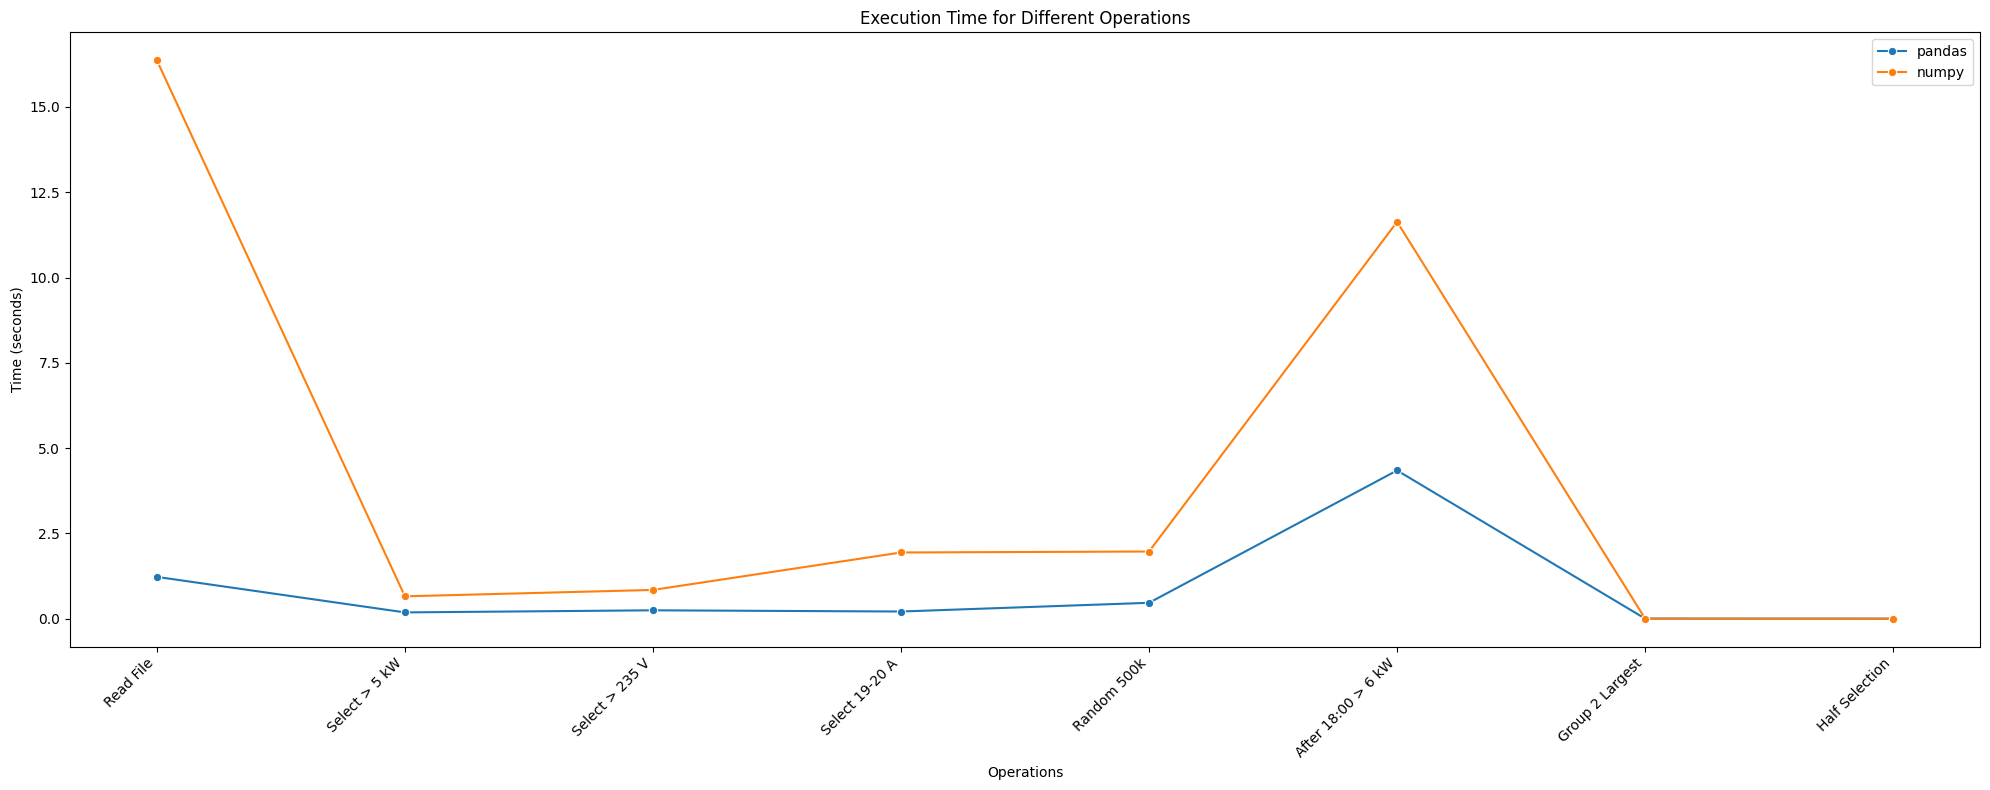

In [11]:
#Візуалізація

operations = [
    'Read File',
    'Select > 5 kW',
    'Select > 235 V',
    'Select 19-20 A',
    'Random 500k',
    'After 18:00 > 6 kW',
    'Group 2 Largest',
    'Half Selection'
]

plt.figure(figsize=(20, 8))
sns.lineplot(x=operations, y=list_time_pd, marker='o', label='pandas')
sns.lineplot(x=operations, y=list_time_np, marker='o', label='numpy')
plt.xlabel('Operations')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for Different Operations')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()